# Exploratory Data Analysis (EDA) on E-commerce Fraud Dataset

This notebook performs exploratory data analysis on the e-commerce fraud dataset. It includes univariate and bivariate analyses, as well as visualizations of key variables.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

In [4]:
# Load the dataset
data = pd.read_csv('../data/raw/Fraud_Data.csv')
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
data.info()
data.describe()
data.isnull().sum()
data.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


np.int64(0)

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [8]:
data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

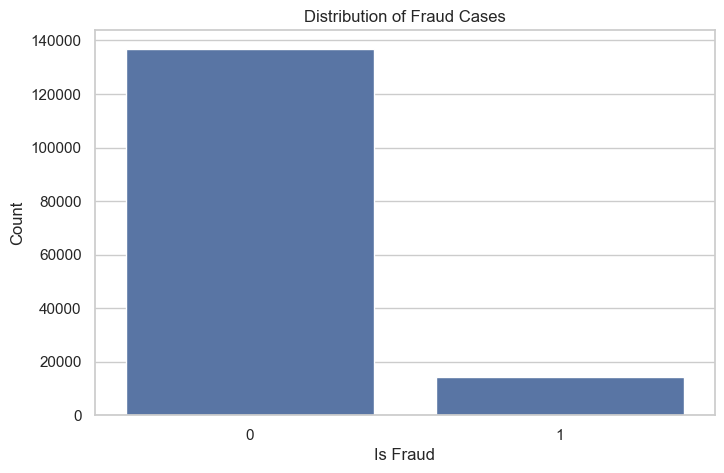

In [7]:
# Univariate analysis: Distribution of target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=data)
plt.title('Distribution of Fraud Cases')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

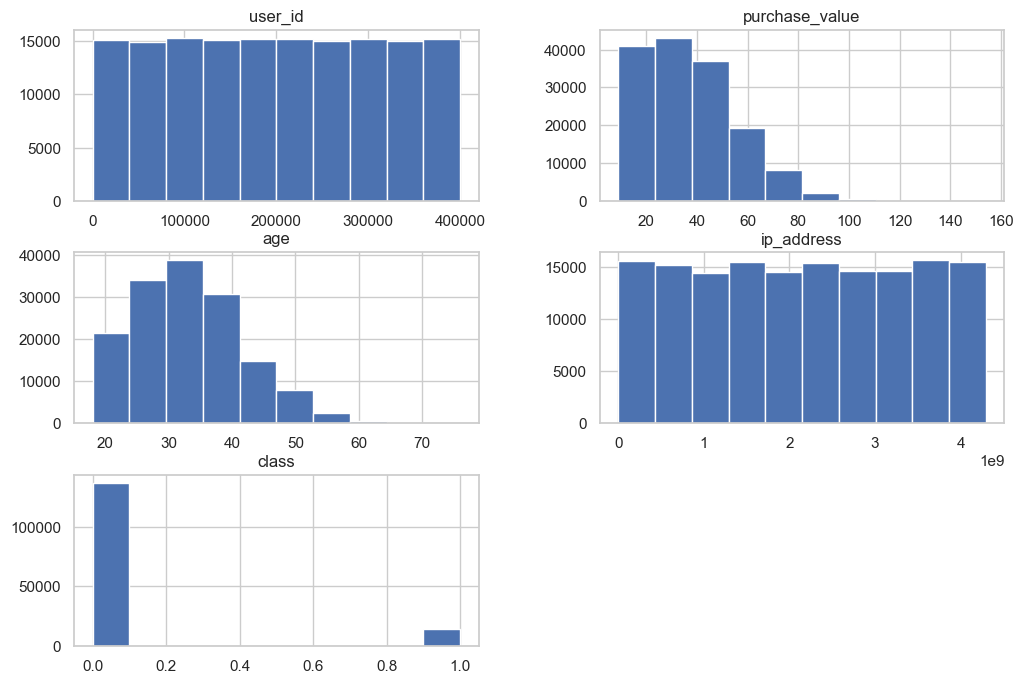

In [ ]:
#feature analysis for numeric and categorial
num_cols = data.select_dtypes(include=['int64','float64']).columns
cat_cols = data.select_dtypes(include=['object','category']).columns
data[num_cols].hist(figsize=(12,8))
plt.show()


<Axes: >

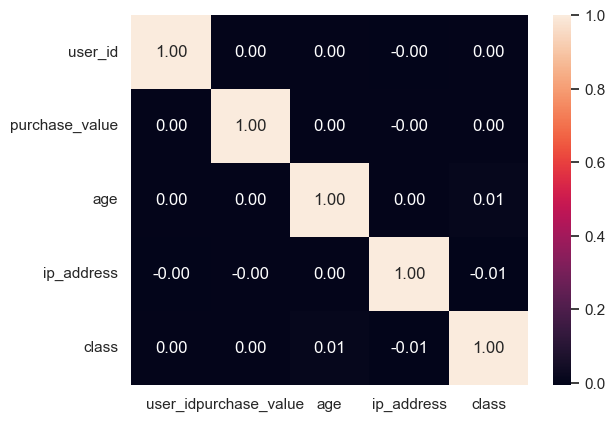

In [ ]:
#Correlation matrix
sns.heatmap(data[num_cols].corr(), annot=True, fmt=".2f")


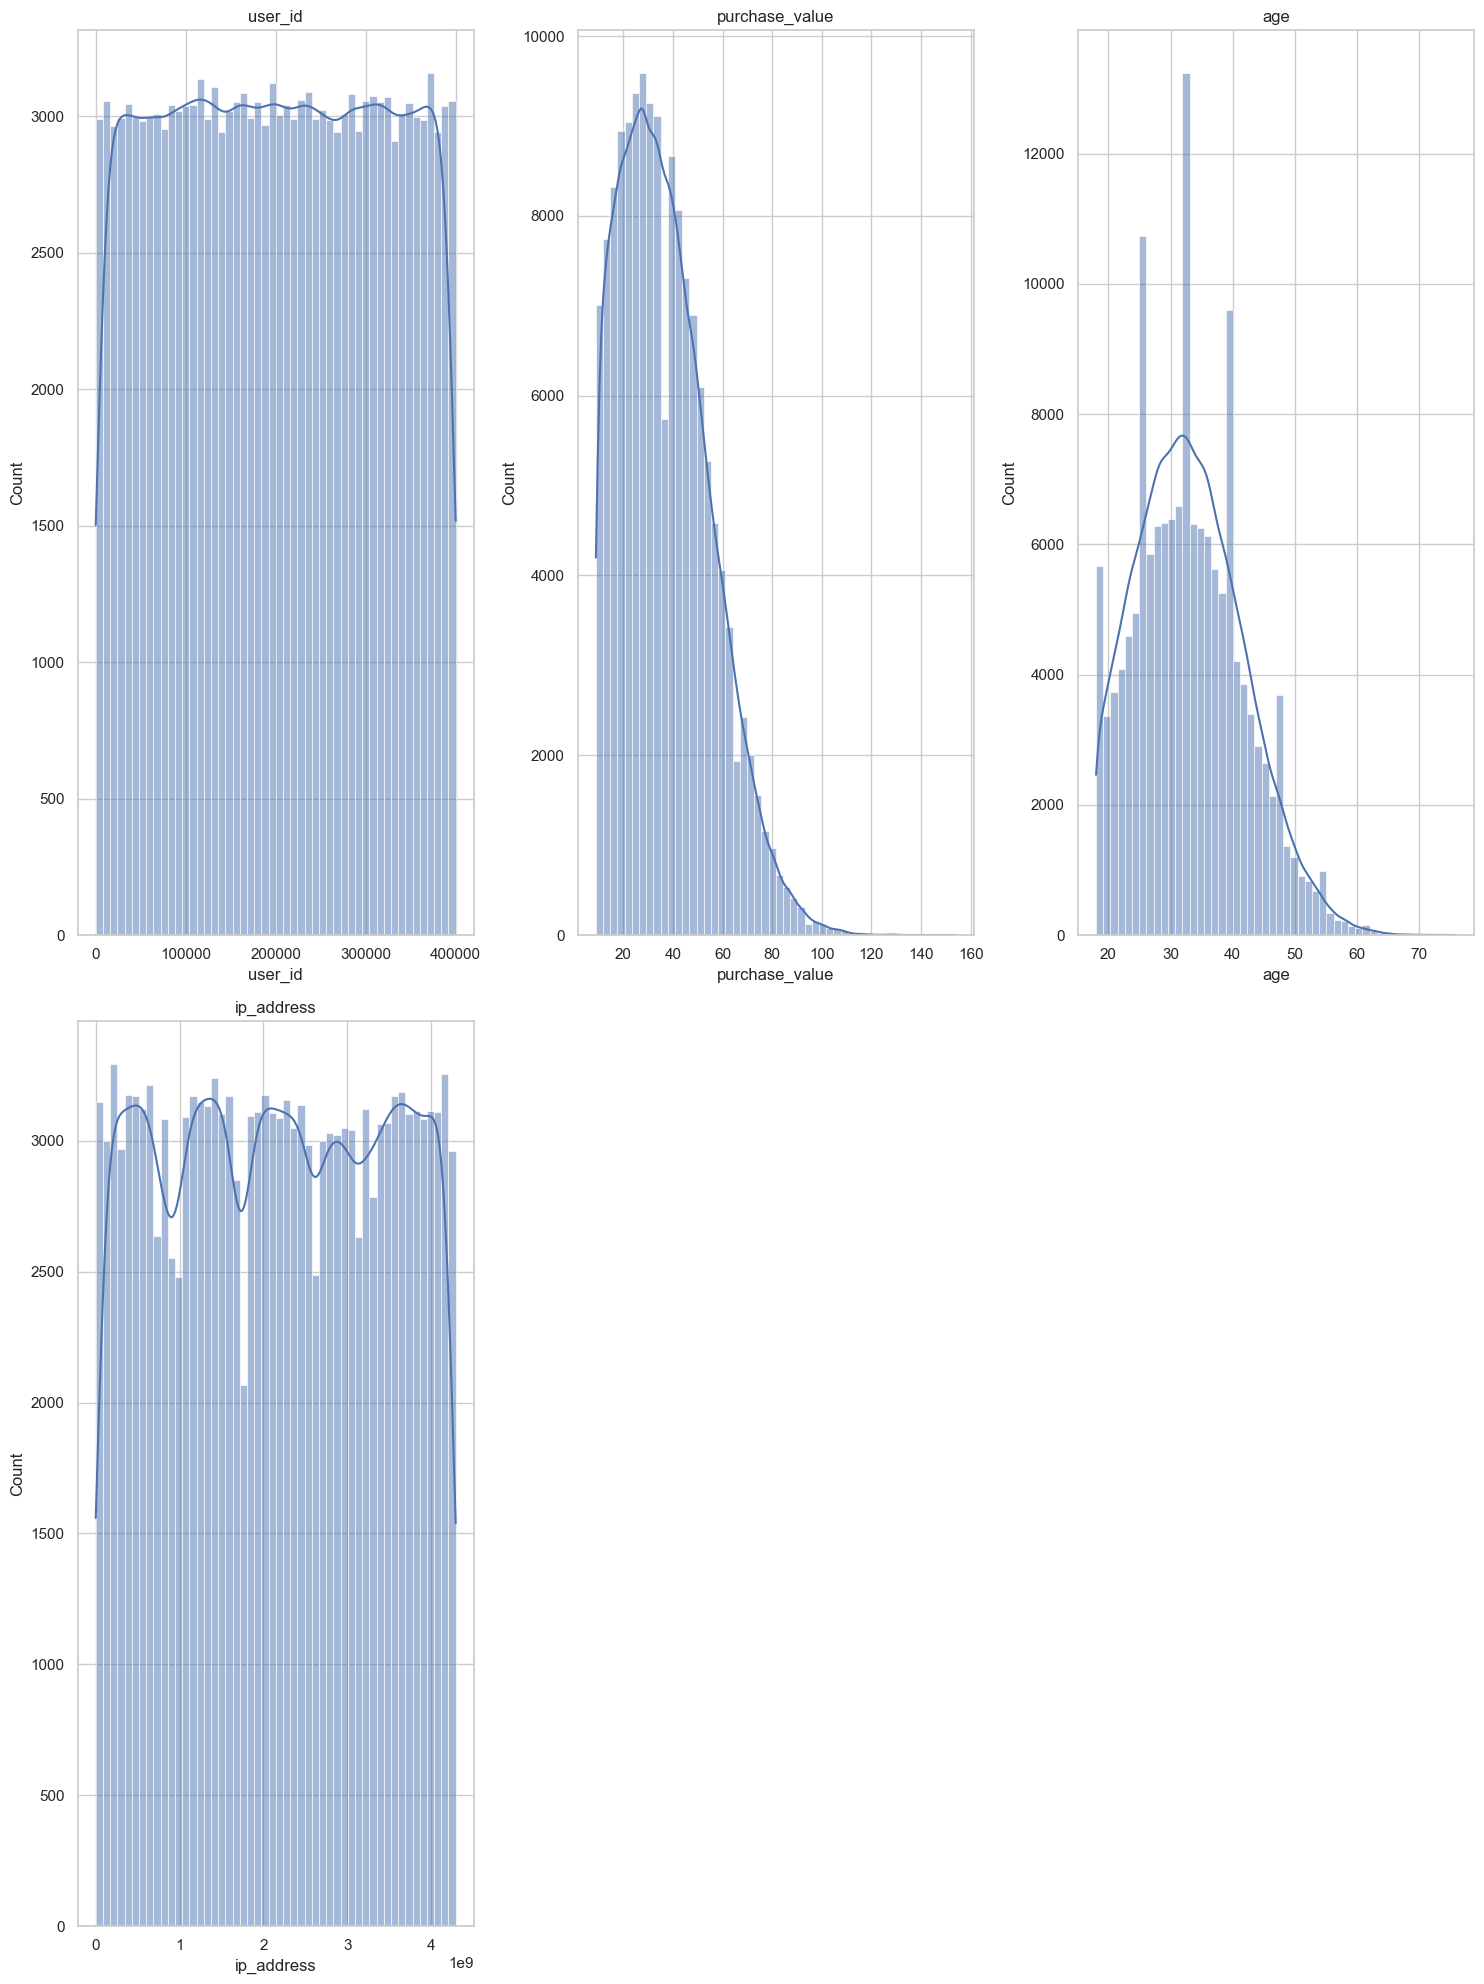

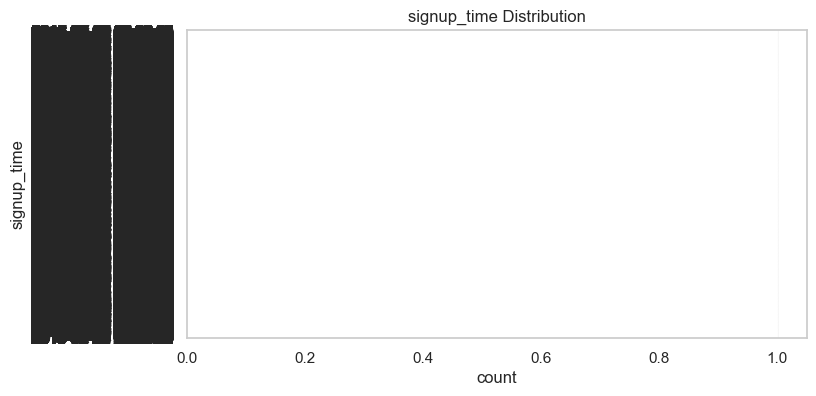

In [ ]:
# -------------------------------
# 4. Univariate Analysis
# -------------------------------

target_col = 'class'
# Numerical Features
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove(target_col)

plt.figure(figsize=(15,20))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Categorical Features
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f"{col} Distribution")
    plt.show()


In [ ]:
# -------------------------------
# 5. Bivariate Analysis (Feature vs Class)
# -------------------------------
# Numerical Features
plt.figure(figsize=(15,20))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    sns.kdeplot(data.loc[data[target_col]==0, col], label="Non-Fraud", fill=True)
    sns.kdeplot(data.loc[data[target_col]==1, col], label="Fraud", fill=True)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()

# Categorical Features
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, hue=target_col, data=data)
    plt.title(f"{col} vs {target_col}")
    plt.show()


In [ ]:
# -------------------------------
# 8. Boxplots to Detect Outliers
# -------------------------------
plt.figure(figsize=(15,20))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `is_fraud` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

## Conclusion

This notebook provided an overview of the exploratory data analysis performed on the e-commerce fraud dataset. Further analysis and preprocessing will be conducted in subsequent notebooks.